In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [3]:
#loading the dataset
df = pd.read_csv("Aqi_dataset.csv", low_memory=False)   
df.head()

,From Date,Dummy,CO,NO2,Ozone,PM10,PM2.5,SO2,AQI
0,2015-03-04,1,0.43,29.94,67.24,54.84,41.79,12.84,67.24
1,2015-04-04,1,6.17,54.56,23.91,112.65,71.03,21.14,112.65
2,2015-08-04,1,0.30,16.40,147.99,167.52,25.21,13.01,167.52
3,2015-09-04,1,2.03,62.37,67.27,196.20,91.29,16.76,196.20
4,2015-10-04,1,3.97,66.83,66.53,239.60,121.09,18.96,239.60


In [4]:
df['From Date'] = pd.to_datetime(df['From Date'])
df.set_index('From Date', inplace=True)

In [5]:
aqi=df.AQI
aqi=aqi.to_numpy()
print(aqi)
print(type(aqi))

[ 67.24 112.65 167.52 ...  62.12  63.34  74.79]
<class 'numpy.ndarray'>


In [6]:
i=0
length=aqi.size
print(length)
tag=[]

while i < length:
    if aqi[i] >= 301:
        tag.append("Hazardous") 
    elif aqi[i] >= 201:
        tag.append("Very Unhealthy") 
    elif aqi[i] >= 151:
        tag.append("Unhealthy")
    elif aqi[i] >= 101:
        tag.append("Unhealthy for sensitive groups")
    elif aqi[i] >= 51:
        tag.append("Moderate")
    else:
        tag.append("Good")
    i=i+1

1539


In [7]:
df.insert(8,'level',tag)

In [8]:
df.head(5)
new_df =df
new_df.to_csv('aqi_levels.csv')

In [9]:
Y=new_df.level
x = new_df.drop(["AQI", "level","Dummy"], axis=1)
#xtemp=new_clt_climate_df.drop('AQI',axis=1)


In [10]:
#print(x)
index = int(0.8 * len(x))
X_train, X_test = x[:index], x[index:]
y_train, y_test = Y[:index], Y[index:]
index
results = {}


## *1) SVM using linear kernel*

In [11]:
from sklearn.svm import SVC
svcclassifier = SVC(kernel='linear', random_state=1)
svcclassifier.fit(X_train, y_train)
y_pred_l = svcclassifier.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred_l))
import sklearn.metrics as metrics
results['linear'] = accuracy_score(y_test, y_pred_l)
accuracy_l= accuracy_score(y_test, y_pred_l)
print("Report: ")
print(classification_report(y_test, y_pred_l))
#print("Matrix: ")
#print(confusion_matrix(y_test, y_pred_l))
#print(accuracy_l)

Accuracy: 0.948051948051948
Report: 
                                precision    recall  f1-score   support

                          Good       0.59      1.00      0.74        13
                     Hazardous       1.00      1.00      1.00        53
                      Moderate       0.95      0.87      0.91        68
                     Unhealthy       0.94      0.98      0.96        52
Unhealthy for sensitive groups       1.00      0.89      0.94        53
                Very Unhealthy       0.99      1.00      0.99        69

                      accuracy                           0.95       308
                     macro avg       0.91      0.96      0.92       308
                  weighted avg       0.96      0.95      0.95       308



Text(0.5,1,'confusion matrix for linear')

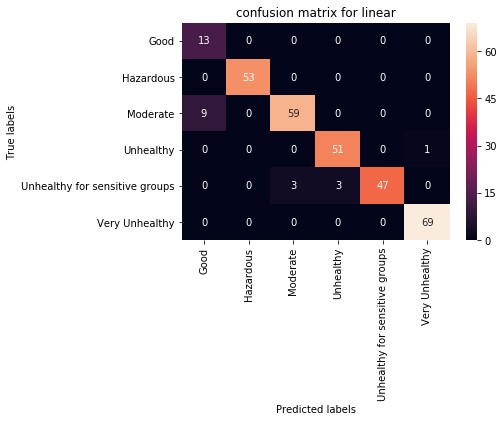

In [12]:
my_tags = ["Good", "Hazardous","Moderate","Unhealthy","Unhealthy for sensitive groups","Very Unhealthy"]
#print confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt     

cm = confusion_matrix(y_test, y_pred_l, my_tags)
ax= plt.subplot()
#plt.xticks(rotation=90)
#plt.yticks(rotation=0)
#plt.ylabel('y',rotation=45)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(my_tags,rotation=90);
ax.yaxis.set_ticklabels(my_tags,rotation=0);
ax.set_title('confusion matrix for linear')

## *2) SVM using polynomial kernel*

In [12]:
from sklearn.svm import SVC
svcclassifier = SVC(kernel='poly', C=300, gamma=0.0001, random_state=1)
svcclassifier.fit(X_train, y_train)
y_pred_p = svcclassifier.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred_p))
results['poly'] = accuracy_score(y_test, y_pred_p)
accuracy_p=accuracy_score(y_test, y_pred_p)
print("Report: ")
print(classification_report(y_test, y_pred_p))
#print("Matrix: ")
#print(confusion_matrix(y_test, y_pred_p))
#print(accuracy_p)

Accuracy: 0.961038961038961
Report: 
                                precision    recall  f1-score   support

                          Good       0.62      1.00      0.76        13
                     Hazardous       1.00      0.98      0.99        53
                      Moderate       1.00      0.88      0.94        68
                     Unhealthy       0.96      0.98      0.97        52
Unhealthy for sensitive groups       1.00      0.96      0.98        53
                Very Unhealthy       0.97      1.00      0.99        69

                      accuracy                           0.96       308
                     macro avg       0.93      0.97      0.94       308
                  weighted avg       0.97      0.96      0.96       308



Text(0.5,1,'confusion matrix for polynomial')

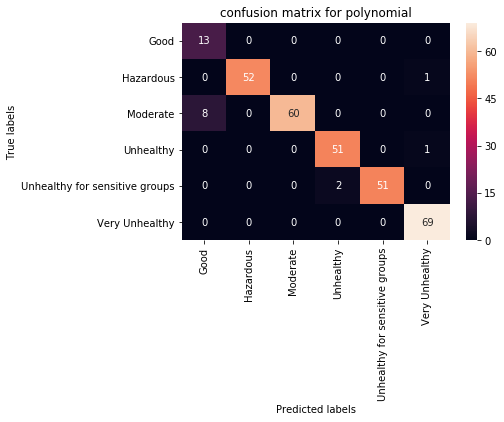

In [13]:
my_tags = ["Good", "Hazardous","Moderate","Unhealthy","Unhealthy for sensitive groups","Very Unhealthy"]
#print confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt     

cm = confusion_matrix(y_test, y_pred_p, my_tags)
ax= plt.subplot()
#plt.xticks(rotation=90)
#plt.yticks(rotation=0)
#plt.ylabel('y',rotation=45)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(my_tags,rotation=90);
ax.yaxis.set_ticklabels(my_tags,rotation=0);
ax.set_title('confusion matrix for polynomial')

## 3)SVM using RBF(Gaussian) kernel

In [14]:
from sklearn.svm import SVC
svcclassifier = SVC(kernel='rbf', C=50, gamma=0.0001, random_state=1)
svcclassifier.fit(X_train, y_train)
y_pred_rbf = svcclassifier.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
results['rbf'] = accuracy_score(y_test, y_pred_rbf)
accuracy_rbf=accuracy_score(y_test, y_pred_rbf)
print("Report: ")
print(classification_report(y_test, y_pred_rbf))
print("Matrix: ")
print(confusion_matrix(y_test, y_pred_rbf))

Accuracy: 0.9545454545454546
Report: 
                                precision    recall  f1-score   support

                          Good       0.59      1.00      0.74        13
                     Hazardous       1.00      1.00      1.00        53
                      Moderate       1.00      0.87      0.93        68
                     Unhealthy       0.93      0.98      0.95        52
Unhealthy for sensitive groups       1.00      0.92      0.96        53
                Very Unhealthy       0.99      1.00      0.99        69

                      accuracy                           0.95       308
                     macro avg       0.92      0.96      0.93       308
                  weighted avg       0.97      0.95      0.96       308

Matrix: 
[[13  0  0  0  0  0]
 [ 0 53  0  0  0  0]
 [ 9  0 59  0  0  0]
 [ 0  0  0 51  0  1]
 [ 0  0  0  4 49  0]
 [ 0  0  0  0  0 69]]


Text(0.5,1,'confusion matrix for rbf')

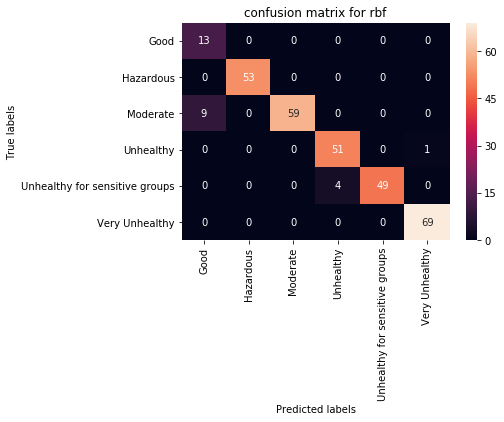

In [15]:
my_tags = ["Good", "Hazardous","Moderate","Unhealthy","Unhealthy for sensitive groups","Very Unhealthy"]
#print confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt     

cm = confusion_matrix(y_test, y_pred_rbf, my_tags)
ax= plt.subplot()
#plt.xticks(rotation=90)
#plt.yticks(rotation=0)
#plt.ylabel('y',rotation=45)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(my_tags,rotation=90);
ax.yaxis.set_ticklabels(my_tags,rotation=0);
ax.set_title('confusion matrix for rbf')

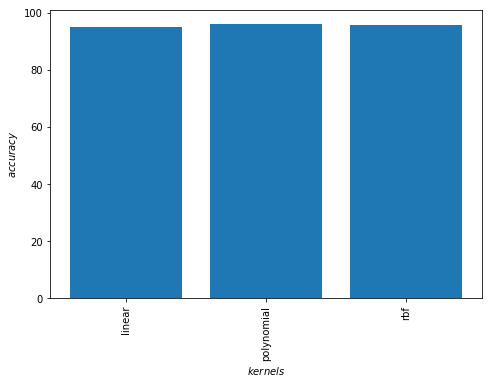

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)
langs = ['linear', 'polynomial','rbf']
accuracy=[accuracy_l*100,accuracy_p*100,accuracy_rbf*100]
plt.xlabel("$kernels$")
plt.ylabel("$accuracy$");
ax.bar(langs,accuracy)
plt.show()


In [17]:
print(results)

{'linear': 0.948051948051948, 'poly': 0.961038961038961, 'rbf': 0.9545454545454546}
